### 라이브러리 및 데이터 로드


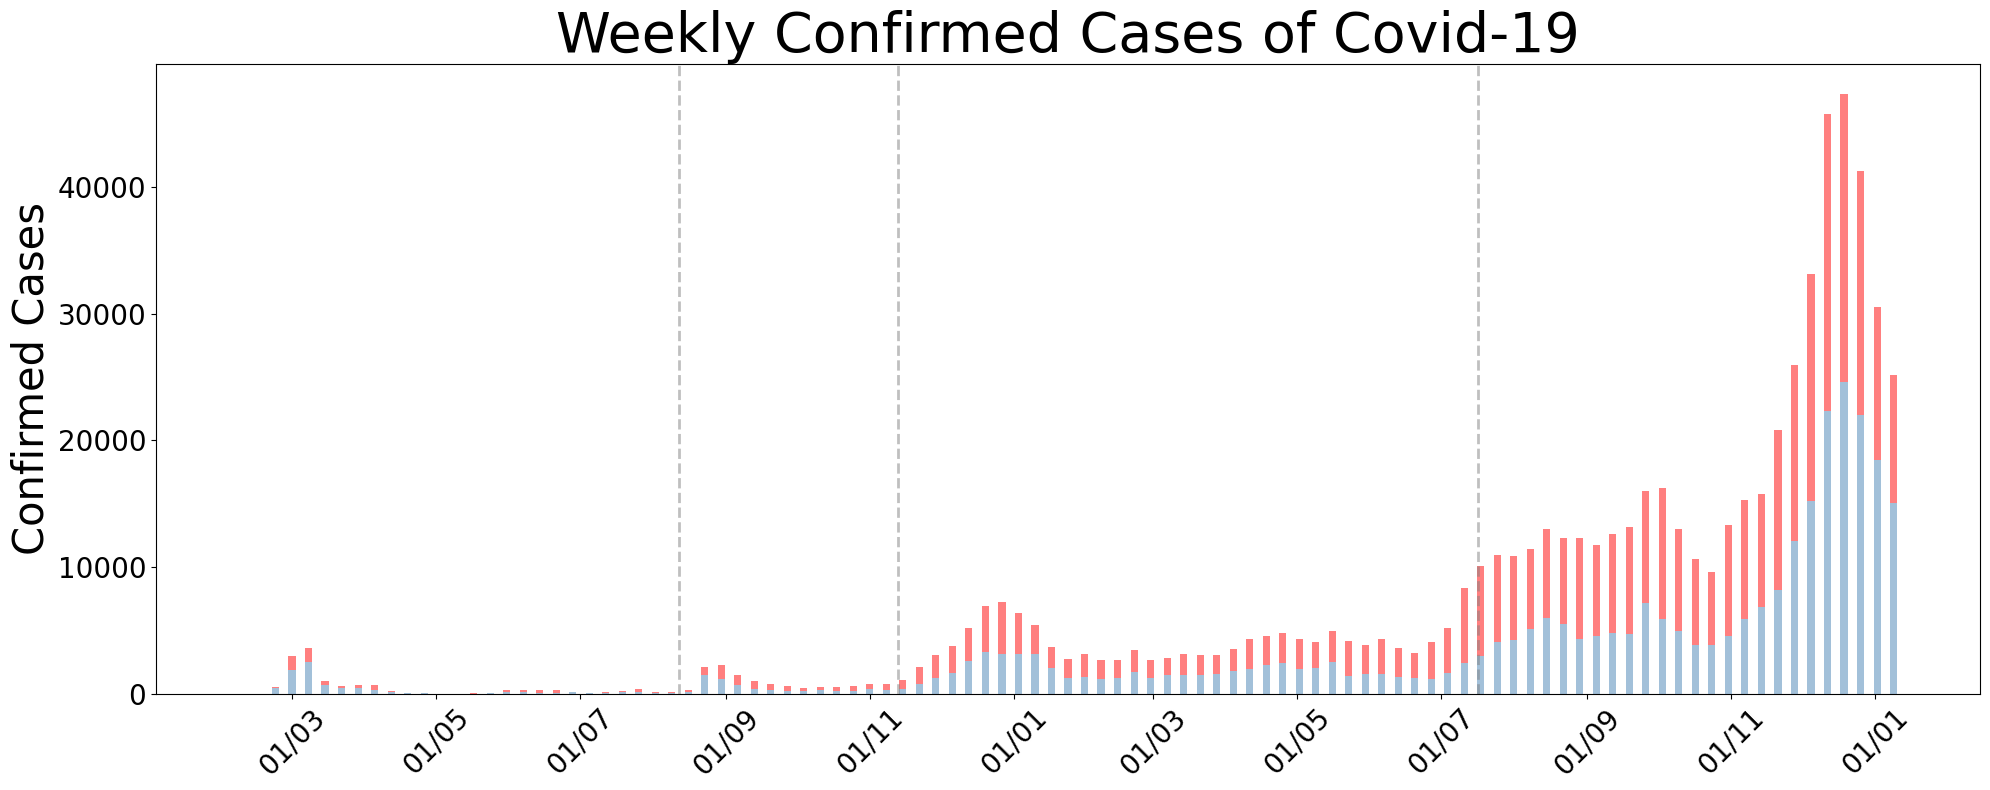

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the data
rel_count=pd.read_csv('/Users/gimsyoni/Desktop/biomathlab/code/rel_count.csv')
rel_count['date'] = pd.to_datetime(rel_count['date'])

# Set date as the index
rel_count.set_index('date', inplace=True)

# Resample the data weekly
weekly_rel_count = rel_count.resample('W').sum().reset_index()

# Plotting the data
fig, ax = plt.subplots(figsize=(20, 8))
plt.rcParams['font.family'] = 'Times New Roman'

for i, row in weekly_rel_count.iterrows():
    total_counts = row['household_counts'] + row['nonhousehold_counts']
    if total_counts == 0:  # Prevent division by zero
        continue
    # Calculate ratios
    household_ratio = row['household_counts'] / total_counts
    nonhousehold_ratio = row['nonhousehold_counts'] / total_counts

    # Calculate the height of each bar
    household_height = row['new_cases'] * household_ratio
    nonhousehold_height = row['new_cases'] * nonhousehold_ratio

    # Draw the bars
    if i == 638:
        ax.bar(row['date'], household_height, color='steelblue', label='Household', alpha=0.5,width=3)
        ax.bar(row['date'], nonhousehold_height, bottom=household_height, color='red', label='Nonhousehold', alpha=0.5,width=3)
    else:
        ax.bar(row['date'], household_height, color='steelblue', alpha=0.5,width=3)
        ax.bar(row['date'], nonhousehold_height, bottom=household_height, color='red', alpha=0.5,width=3)

# Add vertical lines for important dates
important_dates = ['2020-08-12', '2020-11-13', '2021-07-17']

for date in important_dates:
    ax.axvline(pd.to_datetime(date), color='grey', linestyle='--', linewidth=2, alpha=0.5)

# Set x-axis major locator and formatter
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))

# Set tick parameters
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)

# Set labels and title
plt.ylabel('Confirmed Cases', fontsize=30)
plt.title('Weekly Confirmed Cases of Covid-19', fontsize=40)
plt.xticks(rotation=45)

plt.tight_layout()

# Display the plot
plt.show()


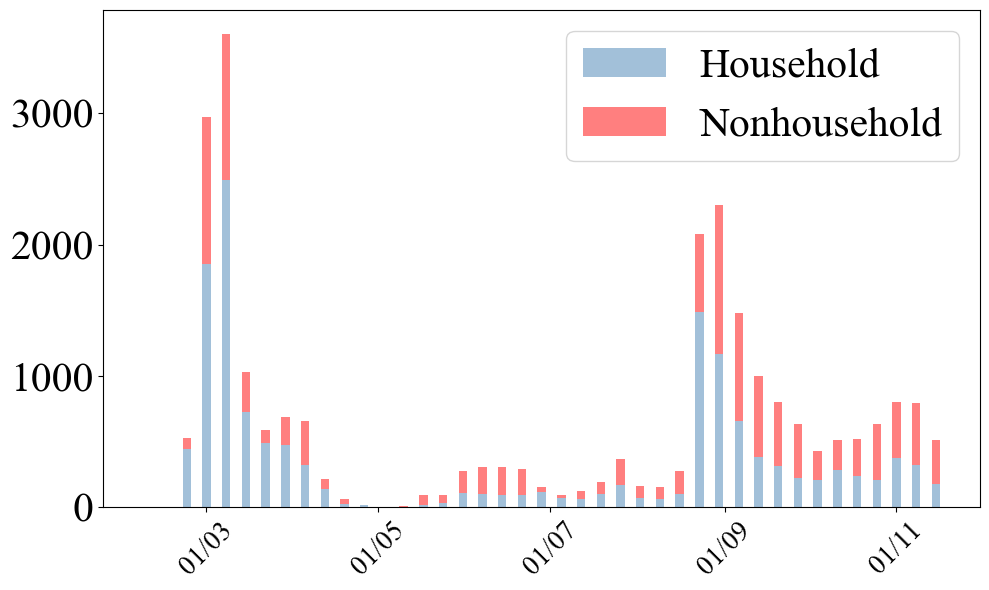

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the data
rel_count=pd.read_csv('/Users/gimsyoni/Desktop/biomathlab/code/rel_count.csv')
rel_count['date'] = pd.to_datetime(rel_count['date'])
rel_count = rel_count[rel_count['date'] < pd.to_datetime('2020-11-13')]

# Set date as the index
rel_count.set_index('date', inplace=True)

# Resample the data weekly
weekly_rel_count = rel_count.resample('W').sum().reset_index()

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
plt.rcParams['font.family'] = 'Times New Roman'

bar_width = 3  # Increase the width of the bars

for i, row in weekly_rel_count.iterrows():
    total_counts = row['household_counts'] + row['nonhousehold_counts']
    if total_counts == 0:  # Prevent division by zero
        continue
    # Calculate ratios
    household_ratio = row['household_counts'] / total_counts
    nonhousehold_ratio = row['nonhousehold_counts'] / total_counts

    # Calculate the height of each bar
    household_height = row['new_cases'] * household_ratio
    nonhousehold_height = row['new_cases'] * nonhousehold_ratio

    # Draw the bars
    if i == 0:
        ax.bar(row['date'], household_height, color='steelblue', width=bar_width, label='Household', alpha=0.5)
        ax.bar(row['date'], nonhousehold_height, bottom=household_height, color='red', width=bar_width, label='Nonhousehold', alpha=0.5)
    else:
        ax.bar(row['date'], household_height, color='steelblue', width=bar_width, alpha=0.5)
        ax.bar(row['date'], nonhousehold_height, bottom=household_height, color='red', width=bar_width, alpha=0.5)

# Add vertical lines for important dates
important_dates = ['2020-08-12']


ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))

ax.tick_params(axis='y', labelsize=30)
ax.tick_params(axis='x', labelsize=20)

plt.xticks(rotation=45)
plt.legend(loc='upper right', fontsize=30)

plt.tight_layout()

# Display the plot
plt.show()


/var/folders/9l/y7rn0rr91k73p0jz0hjkjmy00000gn/T/ipykernel_14800/2074166080.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
/var/folders/9l/y7rn0rr91k73p0jz0hjkjmy00000gn/T/ipykernel_14800/2074166080.py:150: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


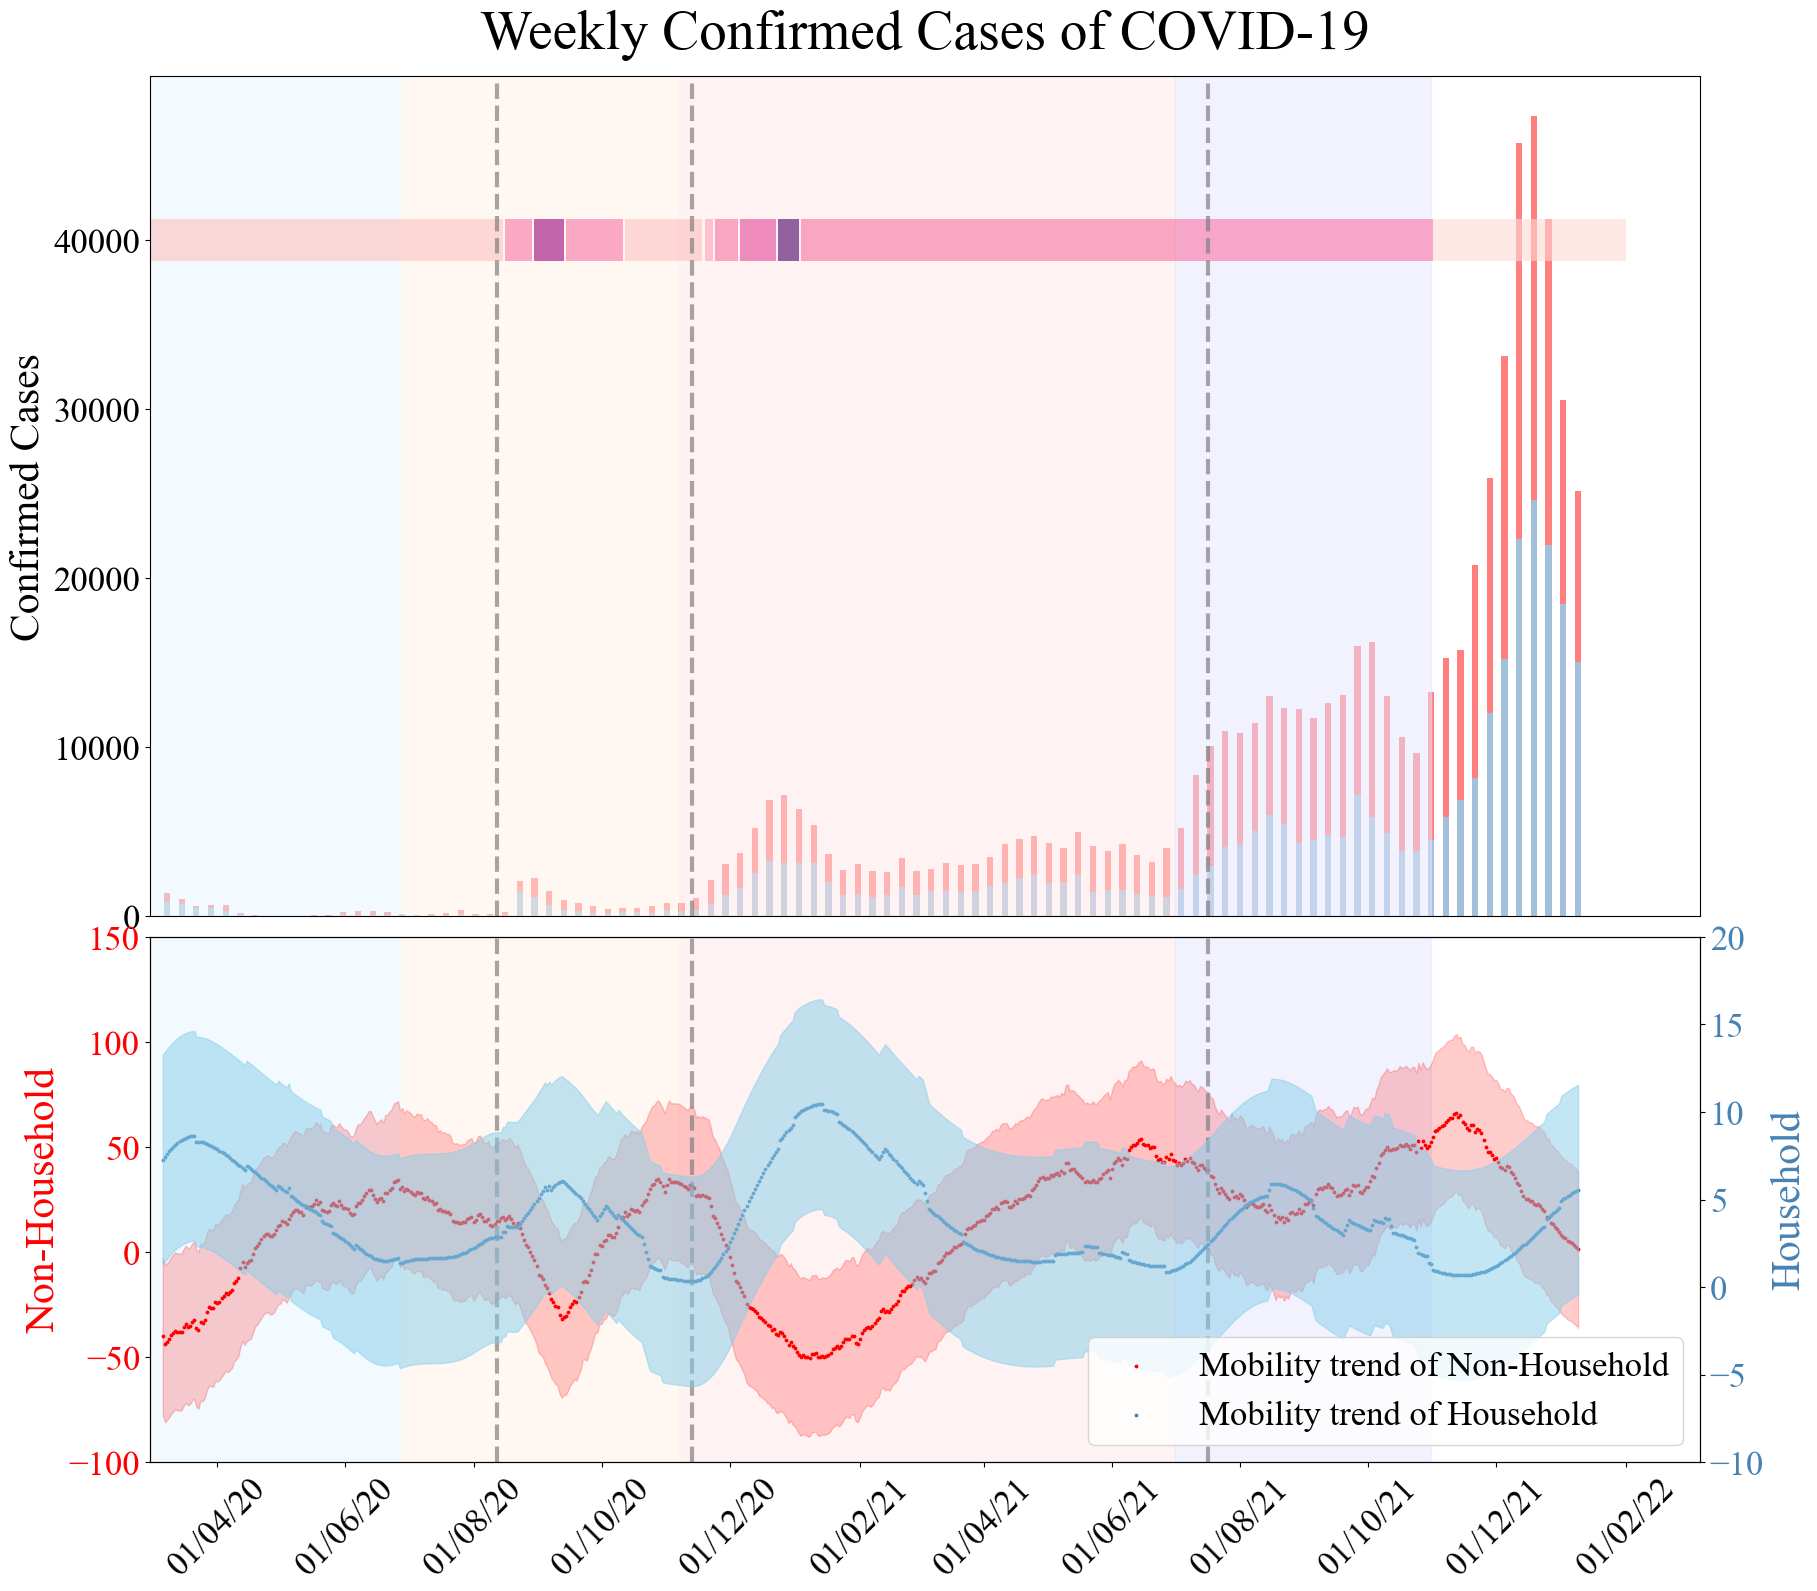

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors

cmap = plt.get_cmap('RdPu', 20)  # 'RdPu' is the Red-Purple colormap, with 20 colors

# Generate color codes
color_codes = [mcolors.rgb2hex(cmap(i)) for i in range(cmap.N)]
color_li=[]
# Display the color codes
for idx, color in enumerate(color_codes):
    color_li.append(color)

    
# Load the data
merged_df = pd.read_csv('h_nh_mobility_trend.csv')
merged_df['date'] = pd.to_datetime(merged_df['date'])

rel_count = pd.read_csv('rel_count.csv')
rel_count['date'] = pd.to_datetime(rel_count['date'])
rel_count = rel_count[rel_count['date'] >= pd.to_datetime('2020-02-19')]

total_start_date = max(merged_df['date'].min(), rel_count['date'].min())
total_end_date = min(merged_df['date'].max(), rel_count['date'].max())

# Filter dataframes to the common date range
merged_df = merged_df[(merged_df['date'] >= total_start_date) & (merged_df['date'] <= total_end_date)]
rel_count = rel_count[(rel_count['date'] >= total_start_date) & (rel_count['date'] <= total_end_date)]

# Set date as the index
rel_count.set_index('date', inplace=True)

# Resample the data weekly
weekly_rel_count = rel_count.resample('W').sum().reset_index()

fig = plt.figure(figsize=(20, 18))
gs = gridspec.GridSpec(2, 1, height_ratios=[1.6, 1], hspace=0.03)  # Add space between subplots

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)

# 첫 번째 그래프: 비율에 따라 막대를 두 부분으로 나누어 그리기 (주간)
bar_width = 3  # Increase the width of the bars

for i, row in weekly_rel_count.iterrows():
    total_counts = row['household_counts'] + row['nonhousehold_counts']
    if total_counts == 0:  # Prevent division by zero
        continue
    household_ratio = row['household_counts'] / total_counts
    nonhousehold_ratio = row['nonhousehold_counts'] / total_counts
    household_height = row['new_cases'] * household_ratio
    nonhousehold_height = row['new_cases'] * nonhousehold_ratio
    if i == 1:
        ax1.bar(row['date'], household_height, color='steelblue', width=bar_width, label='Household', alpha=0.5)
        ax1.bar(row['date'], nonhousehold_height, bottom=household_height, color='red', width=bar_width, label='Nonhousehold', alpha=0.5)
    else:
        ax1.bar(row['date'], household_height, color='steelblue', width=bar_width, alpha=0.5)
        ax1.bar(row['date'], nonhousehold_height, bottom=household_height, color='red', width=bar_width, alpha=0.5)

# 강화 및 완화 시기 수직선 추가
important_dates = ['2020-08-12', '2020-11-13', '2021-07-17']
for date in important_dates:
    ax1.axvline(pd.to_datetime(date), alpha=0.7, color='grey', linestyle='--', linewidth=3)

    ax2.axvline(pd.to_datetime(date), alpha=0.7, color='grey', linestyle='--', linewidth=3)
    # ax2.axvline(pd.to_datetime(date), alpha=0.7, color='grey', linestyle='--', linewidth=3)

ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
ax1.axes.xaxis.set_visible(False)
ax1.tick_params(axis='y', labelsize=25)
ax1.tick_params(axis='x', labelsize=25)
ax1.set_ylabel('Confirmed Cases', fontsize=30)
ax1.set_title('Weekly Confirmed Cases of COVID-19', fontsize=40, pad=20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# 두 번째 그래프: Mobility Trends

# 기간별 배경색 설정
periods = [
    ('2020-02-29', '2020-06-27', '#e6f7ff'),  # Light blue for Level 1
    ('2020-06-28', '2020-11-06', '#fff2e6'),  # Light orange for Level 3
    ('2020-11-07', '2021-07-01', '#ffe6e6'),  # Light red for Level 5
    ('2021-07-01', '2021-10-31', '#e6e6ff')   # Light purple for Level 4
]

for start, end, color in periods:
    ax1.axvspan(pd.to_datetime(start), pd.to_datetime(end), color=color, alpha=0.5)
    ax2.axvspan(pd.to_datetime(start), pd.to_datetime(end), color=color, alpha=0.5)

ax2.scatter(merged_df['date'], merged_df['fitted_trend'], color='red', s=3,label='Mobility trend of Non-Household')
ax2.fill_between(merged_df['date'], merged_df['fitted_trend_lower'] , merged_df['fitted_trend_upper'], color='red', alpha=0.2)
ax2.set_ylabel('Non-Household', fontsize=30)
ax2.tick_params(axis='x', labelsize=25)
ax2.tick_params(axis='y', labelsize=25)

ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
for tick in ax2.get_xticklabels():
    tick.set_rotation(45)

color_num=5
policy_phases = [
    {'start': '2020-02-29', 'end': '2020-08-15', 'label': 'Level 1', 'color': color_li[color_num]},    # Light Green
    {'start': '2020-08-16', 'end': '2020-08-29', 'label': 'Level 2', 'color': color_li[color_num+4]},   # Soft Pink
    {'start': '2020-08-30', 'end': '2020-09-13', 'label': 'Strengthened Level 2', 'color': color_li[color_num+10]}, # Deep Pink
    {'start': '2020-09-14', 'end': '2020-10-11', 'label': 'Level 2', 'color': color_li[color_num+4]},   # Soft Pink
    {'start': '2020-10-12', 'end': '2020-11-18', 'label': 'Level 1', 'color': color_li[color_num]},   # Light Green
    {'start': '2020-11-19', 'end': '2020-11-23', 'label': 'Level 1.5', 'color': color_li[color_num+2]},  # Medium Green
    {'start': '2020-11-24', 'end': '2020-12-05', 'label': 'Level 2', 'color': color_li[color_num+4]},   # Soft Pink
    {'start': '2020-12-06', 'end': '2020-12-23', 'label': 'Level 2.5', 'color': color_li[color_num+6]},   # Deep pink to Red
    {'start': '2020-12-24', 'end': '2021-01-03', 'label': 'Special Intervention', 'color': color_li[color_num+14]}, # Dark Red
    {'start': '2021-01-04', 'end': '2021-11-01', 'label': 'Level 2', 'color': color_li[color_num+4]},   # Deep pink to Red
    {'start': '2021-11-01', 'end': '2022-2-01', 'label': 'No level', 'color': color_li[color_num-2]},   # Deep pink to Red

]

for phase in policy_phases:
    ax1.barh(y=40000, left=pd.to_datetime(phase['start']), width=(pd.to_datetime(phase['end']) - pd.to_datetime(phase['start'])).days, height=2500, color=phase['color'], alpha=0.6, label=phase['label'])



interventions_phase=['2020-06-27','2020-11-06','2021-07-01']


ax4 = ax2.twinx()
ax4.scatter(merged_df['date'], merged_df['home_fitted_trend'], color='steelblue', s=3,label='Mobility trend of Household')
ax4.fill_between(merged_df['date'], merged_df['home_fitted_lower'], merged_df['home_fitted_upper'], color='skyblue', alpha=0.5)

lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax4.get_legend_handles_labels()
ax4.legend(lines1 + lines2, labels1 + labels2, loc='lower right', fontsize=25)



ax2.tick_params(axis='y', labelsize=25, labelcolor='red')  # Set the color of the nonhousehold y-axis labels and ticks to red
ax4.tick_params(axis='y', labelsize=25, labelcolor='steelblue')  # Set the color of the household y-axis labels and ticks to steelblue

# Update y-axis labels to also reflect their respective colors
ax2.set_ylabel('Non-Household', fontsize=30, color='red')  # Set the nonhousehold label color to red
ax4.set_ylabel('Household', fontsize=30, color='steelblue')  # Set the household label color to steelblue


ax4.set_ylim([-10, 20])
ax2.set_ylim([-100, 150])

plt.tight_layout()
plt.show()
